## 📝 Netflix Movie Dataset Analysis

 ## Step 1: Import Libraries


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Set some plot styles
plt.style.use('fivethirtyeight')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 6)


## Step 2: Load the Dataset

In [18]:
# Load the CSV file
df = pd.read_csv('mymoviedb1.csv',lineterminator = '\n')
#lineterminator to get data in rows


## Step 3: Take a Quick Look at the Data

In [19]:
# Display the first 5 rows
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## Step 4: Check Shape, Info, and Missing Values

In [20]:
# Dataset dimensions
print("Shape:", df.shape)

# Basic info
df.info()

# Missing values
df.isnull().sum()


Shape: (9827, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

## Step 5: Drop Unnecessary Columns

In [21]:
# Dropping columns that are not needed for our analysis
df.drop(['Overview', 'Original_Language', 'Poster_Url'], axis=1, inplace=True)


## Step 6: Convert Date and Extract Year

In [22]:
# Convert Release_Date to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

# Extract release year
df['Release_Year'] = df['Release_Date'].dt.year


## Step 7: Check for Duplicates

In [23]:
# Check duplicates
df.duplicated().sum()


0

## Step 8: Genre Handling (Split + Explode)

In [24]:
# Split multiple genres into separate rows
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)


## Step 9: Categorize Vote_Average into Ratings

In [25]:
# Creating rating categories
vote_bins = [df['Vote_Average'].min(), 
             df['Vote_Average'].quantile(0.25), 
             df['Vote_Average'].quantile(0.5), 
             df['Vote_Average'].quantile(0.75), 
             df['Vote_Average'].max()]
labels = ['Poor', 'Below Average', 'Average', 'Good']
df['Rating_Category'] = pd.cut(df['Vote_Average'], bins=vote_bins, labels=labels)


## Step 10: Normalize Popularity

In [26]:
# Normalize popularity using MinMaxScaler
scaler = MinMaxScaler()
df['Normalized_Popularity'] = scaler.fit_transform(df[['Popularity']])


## Step 11: Exploratory Data Analysis (EDA)

In [34]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

# Unique values
print("\nNumber of Unique Values in Each Column:")
print(df.nunique())

# Value counts for Genre
print("\nTop 10 Genres:")
print(df['Genre'].value_counts().head(10))

# Value counts for Rating Categories
print("\nRating Category Counts:")
print(df['Rating_Category'].value_counts())

# Year-wise movie count
print("\nYear-wise Movie Count (First 10 Years):")
print(df['Release_Year'].value_counts().sort_index().head(10))


Summary Statistics:
                        Release_Date    Popularity    Vote_Count  \
count                          25793  25793.000000  25793.000000   
mean   2006-07-17 20:02:03.382312704     42.001288   1504.824526   
min              1902-04-17 00:00:00     13.354000      0.000000   
25%              2000-09-01 00:00:00     16.366000    166.000000   
50%              2011-01-28 00:00:00     21.865000    490.000000   
75%              2017-08-30 00:00:00     36.503000   1501.000000   
max              2024-07-03 00:00:00   5083.954000  31077.000000   
std                              NaN    113.341050   2743.009590   

       Vote_Average  Release_Year  Normalized_Popularity  
count  25793.000000  25793.000000           25793.000000  
mean       6.475749   2006.016322               0.005650  
min        0.000000   1902.000000               0.000000  
25%        6.000000   2000.000000               0.000594  
50%        6.600000   2011.000000               0.001678  
75%        7.

## Step 12: Visualizations

## 1. Top 10 Genres

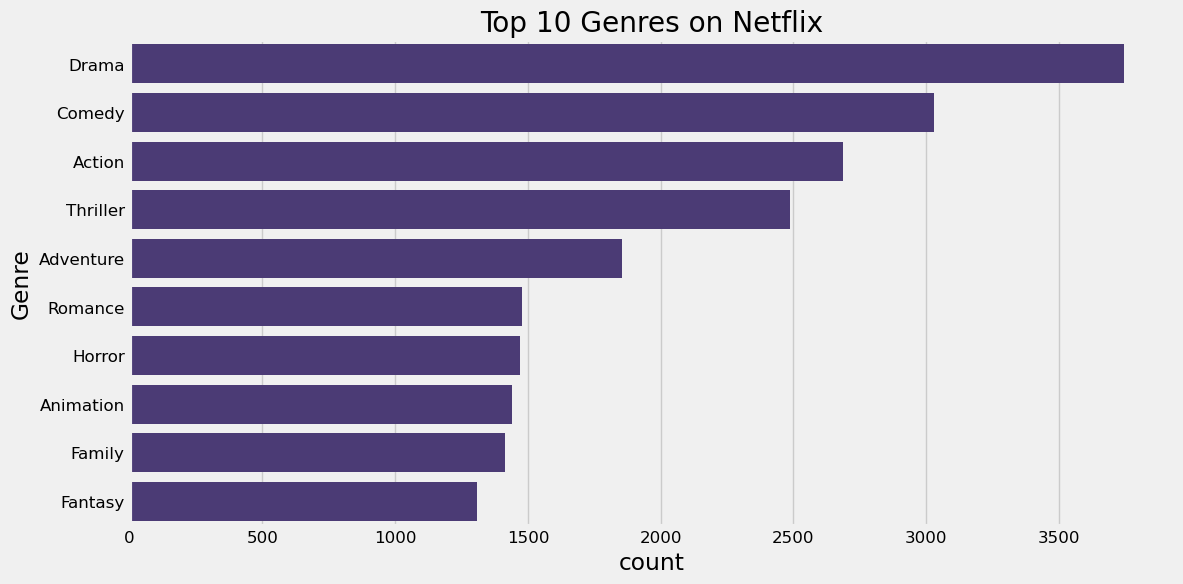

In [35]:
sns.countplot(data=df[df['Genre'].isin(df['Genre'].value_counts().head(10).index)], 
              y='Genre', order=df['Genre'].value_counts().head(10).index)
plt.title('Top 10 Genres on Netflix')
plt.show()


## 2. Rating Distribution by Genre

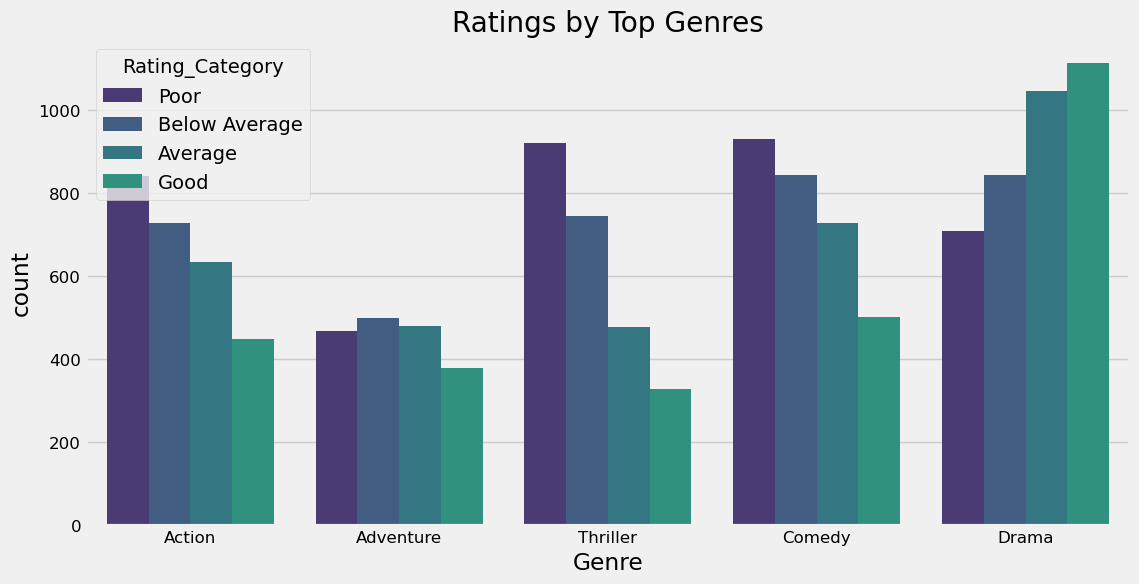

In [36]:
sns.countplot(data=df[df['Genre'].isin(df['Genre'].value_counts().head(5).index)],
              x='Genre', hue='Rating_Category')
plt.title('Ratings by Top Genres')
plt.show()


## 3. Movies Released Over Years

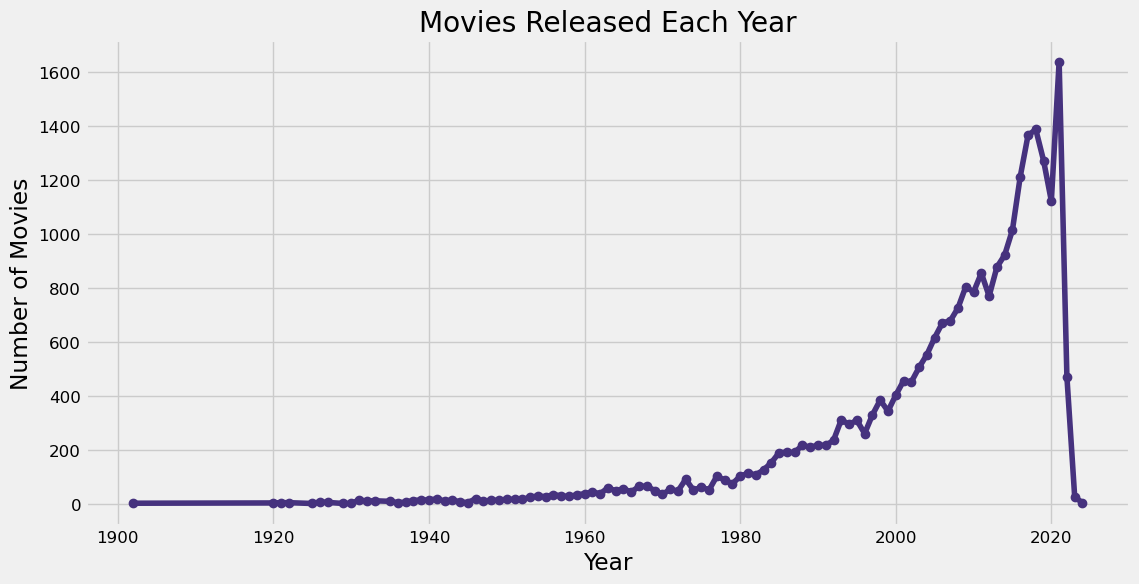

In [37]:
df['Release_Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


## 4. Popularity vs Vote Count

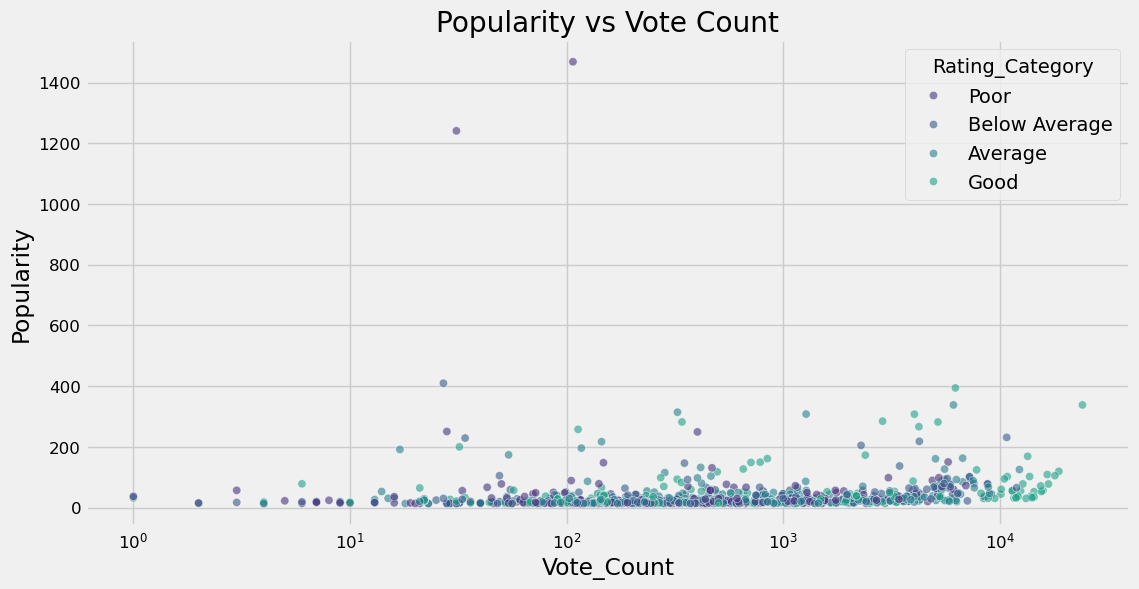

In [38]:
sample_df = df.sample(1000, random_state=42)
sns.scatterplot(data=sample_df, x='Vote_Count', y='Popularity', hue='Rating_Category', alpha=0.6)
plt.xscale('log')
plt.title('Popularity vs Vote Count')
plt.show()


##  Advanced Analysis

## Correlation

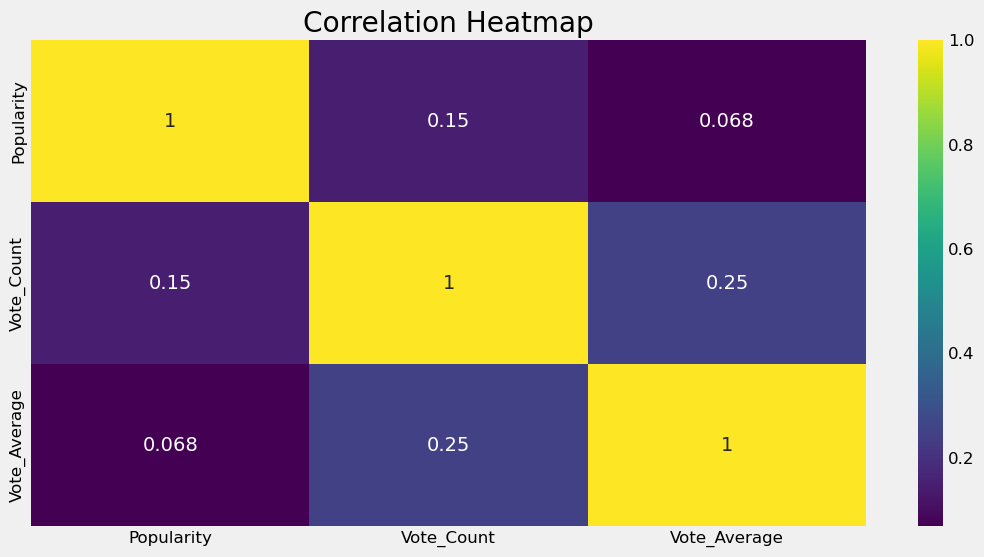

In [39]:
df[['Popularity', 'Vote_Count', 'Vote_Average']].corr()
sns.heatmap(df[['Popularity', 'Vote_Count', 'Vote_Average']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


## Genre Popularity Trend

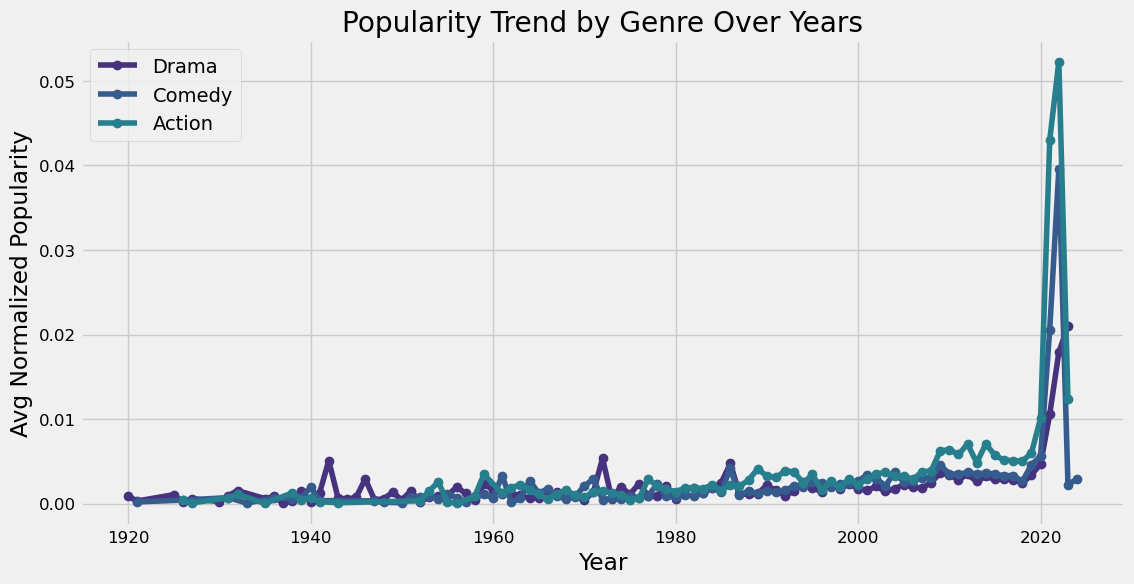

In [40]:
top_genres = df['Genre'].value_counts().head(3).index
for genre in top_genres:
    genre_df = df[df['Genre'] == genre].groupby('Release_Year')['Normalized_Popularity'].mean()
    plt.plot(genre_df.index, genre_df.values, marker='o', label=genre)

plt.legend()
plt.title('Popularity Trend by Genre Over Years')
plt.xlabel('Year')
plt.ylabel('Avg Normalized Popularity')
plt.grid(True)
plt.show()


## Create a Success Score

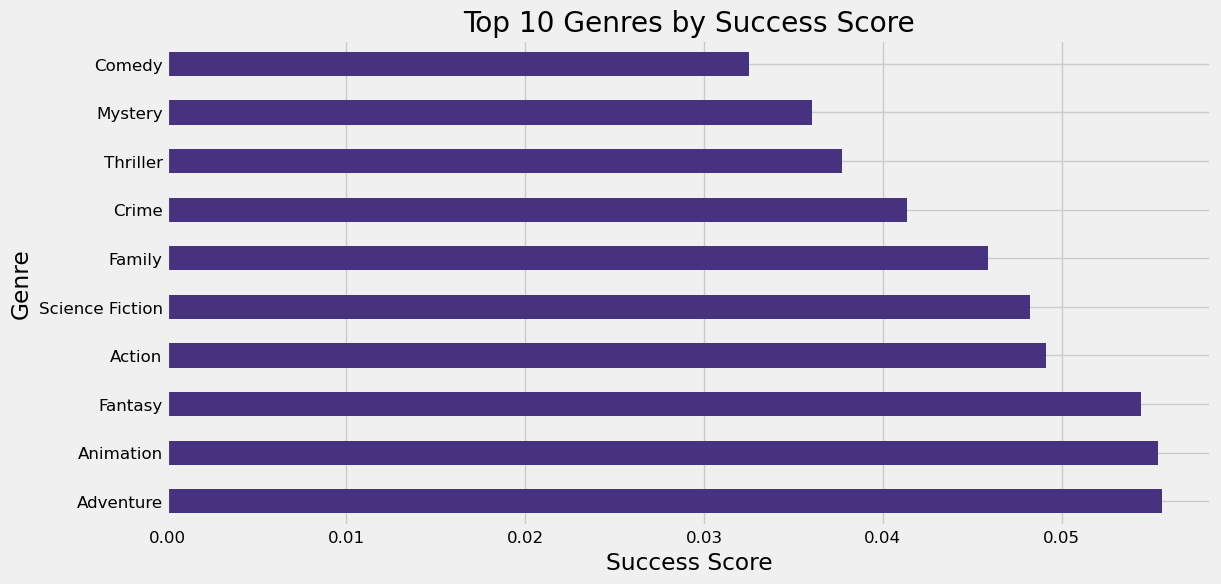

In [41]:
# Success = Popularity * Quality
df['Success_Score'] = df['Normalized_Popularity'] * df['Vote_Average']

# Top genres by success
top_success = df.groupby('Genre')['Success_Score'].mean().sort_values(ascending=False).head(10)
top_success.plot(kind='barh')
plt.title('Top 10 Genres by Success Score')
plt.xlabel('Success Score')
plt.show()


## Insights & Recommendations

# 📊 Insights from Visuals

## 1. **Top 10 Genres on Netflix**
- **Drama**, **Comedy**, and **Action** dominate the content on Netflix.
- Other popular genres include **Thriller**, **Adventure**, and **Romance**.
- These genres have the highest number of movies, indicating strong audience interest or production focus.

## 2. **Ratings by Top Genres**
- **Drama** and **Comedy** show the highest number of "Good" ratings.
- **Action** and **Thriller** have a significant number of "Poor" and "Below Average" ratings, suggesting high quantity but possibly lower quality.
- **Adventure** genre ratings are evenly spread, showing mixed audience reception.

## 3. **Movies Released Each Year**
- There's been a massive spike in movie releases post-2000, peaking around **2020**.
- A sharp drop is observed post-2021, possibly due to the pandemic affecting production.

## 4. **Popularity vs Vote Count**
- Movies with higher vote counts generally have higher popularity.
- Many movies have low vote counts but are still somewhat popular—could be niche hits or heavily marketed.
- **Good-rated** movies tend to have higher vote counts and popularity.

---

# ✅ Recommendations

## 📺 **For Netflix:**

### 1. **Double Down on Drama & Comedy**
- These genres are not only the most produced but also receive the best ratings. 
- Continue investing and improving content in these genres.

### 2. **Quality Control in Action & Thriller**
- Despite being highly produced, these genres have a lot of "Poor" and "Below Average" rated movies. Consider:
    - Stricter selection criteria.
    - Better storytelling or casting.
    - Audience feedback before renewals or sequels.

### 3. **Support for Adventure & Animation**
- These genres show potential with moderate success. 
- They could be boosted with marketing and quality improvements.

### 4. **Revive Post-2020 Content Strategy**
- The production dip after **2020** indicates a gap. 
- Focus on recovering that momentum with fresh and appealing content, especially in the high-performing genres.

---

## 📈 **For Data-Driven Decision-Making:**

### 1. **Track Success Score**
- Use the **Success Score** (Popularity × Vote Average) as a KPI for greenlighting sequels or future projects.

### 2. **User Ratings Segmentation**
- Further break down ratings by country or age group to personalize genre recommendations for different user segments.

### 3. **Focus on Consistent Genres**
- Genres with consistent yearly popularity growth (seen in earlier trend chart) are safer bets for long-term planning.


## 🎯 Conclusion

This project analyzed Netflix's movie content based on genre, popularity, ratings, and release trends. With effective visualizations and analysis, we uncovered what makes content successful on Netflix and gave practical recommendations for improving content strategy and user engagement.
